___
# 4.What is the most optimal skill to learn for Data Analysts?

## Methodology
1.  Continue from last notebook to find percent of postings with skill
2.  Visualize median salary vs percent skill demand
3.  (Optional) Determine if certain technologies are more prevalent

## Original Exploration
* `15_Matplotlib_Scatter_Plots.ipynb`
* `16_Matplotlib_Advanced_Customization.ipynb`
___

In [29]:
import ast 
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)  # This converts the string representation to an actual list

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [31]:
df_DA_Egy=df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Egypt')].copy()


In [32]:
df_DA_Egy= df_DA_Egy.dropna(subset=['salary_year_avg'])
df_DA_Egy_exploded= df_DA_Egy.explode('job_skills')

In [44]:
df_DA_skills= df_DA_Egy_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills= df_DA_skills.rename(columns={'count': 'skills_count', 'median': 'median_salary'})

job_count=len(df_DA_Egy)

df_DA_skills['persent']= df_DA_skills['skills_count']/ job_count *100

df_DA_skills

,skills_count,median_salary,persent
job_skills,,,
python,3,57500.0,75.0
flow,2,62975.0,50.0
sql,2,63282.0,50.0
excel,1,51014.0,25.0
dax,1,75550.0,25.0
azure,1,75550.0,25.0
power bi,1,75550.0,25.0
r,1,51014.0,25.0
sap,1,75550.0,25.0


C:\Users\go\AppData\Local\Temp\ipykernel_12204\1332914010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


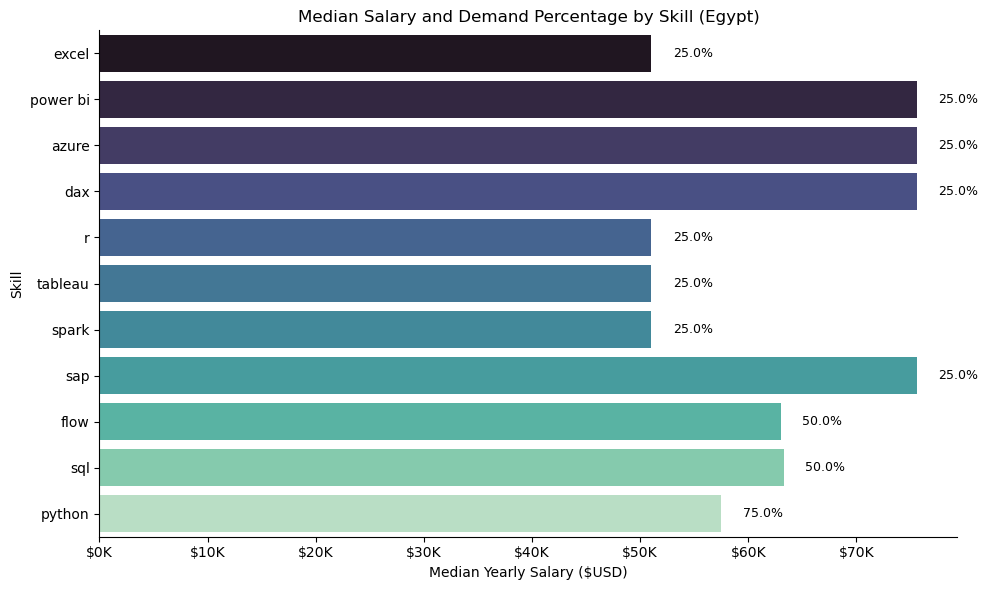

In [ ]:
# Sort by skills_count
df_plot = df_DA_skills.sort_values("skills_count", ascending=True).head(15)  # show top 15 for clarity

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_plot,
    x="median_salary", 
    y=df_plot.index, 
    palette="mako"
)

# Format salary axis as $K
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Add percentage labels on bars
for i, (salary, percent) in enumerate(zip(df_plot["median_salary"], df_plot["persent"])):
    plt.text(salary + 2000, i, f"{percent:.1f}%", va="center", fontsize=9, color="black")

sns.despine()
plt.xlabel("Median Yearly Salary ($USD)")
plt.ylabel("Skill")
plt.title("Median Salary and Demand Percentage by Skill (Egypt)")
plt.tight_layout()
plt.show()